In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df=pd.read_csv("C:/Users/USER/Downloads/titanic_dataset.csv")

In [130]:
df.reset_index(drop=True,inplace=True)

In [131]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df.shape

(891, 12)

In [133]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
df.drop(['PassengerId','Name','Ticket',],axis=1,inplace=True)

In [135]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [136]:
df["Cabin"].nunique()

147

In [137]:
#since most of the values are missing in the cabin column its better to drop it,also it has 147 unique values,so it wont be of that much important in model building

In [138]:
df.drop("Cabin",axis=1,inplace=True)

In [139]:
med=df["Age"].median()

In [142]:
df["Age"]=df["Age"].fillna(med)

In [143]:
mod=df["Embarked"].mode
mod

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [146]:
df["Embarked"]=df["Embarked"].fillna("S")

In [147]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [148]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [149]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [150]:
df=pd.get_dummies(df)

In [151]:
df.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1


In [152]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [153]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

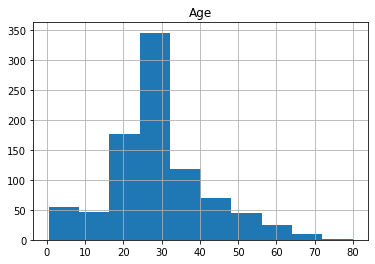

In [154]:
df.hist("Age")

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

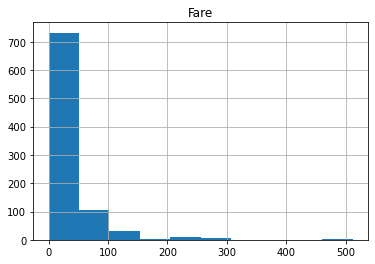

In [155]:
df.hist("Fare")

<AxesSubplot:>

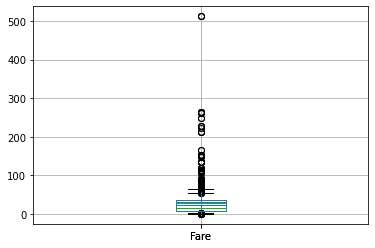

In [156]:
df.boxplot("Age")#there are outliers,but outlier removal isnt needed for this dataset.
df.boxplot("Fare")

In [157]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


In [158]:
#Since we have less number of columns,lets keep even the featuren having little corelation..Embarked is founf of having litle coorealtion with traget..but lets keep it.

In [159]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#lets split the data into independent and dependent variables

In [208]:
num_columns=df[["Age","Fare"]]#these are the onlu numerical columns.and it only need scaling

In [168]:
#lets scale the data

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [209]:
#let us fit the scaler to the train set,it will learn the parameters
scaler.fit(num_columns)
num_columns=scaler.transform(num_columns)


In [217]:
df[["Age","Fare"]]=num_columns

In [218]:
df.columns

Index(['level_0', 'index', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [219]:
X=df[['Pclass', 'Age', 'SibSp', 'Parch','Fare','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [220]:
y=df["Survived"]

In [221]:
#lets split the data into train and test data

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#### KNN

In [238]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_pred_knn=Knn.predict(X_test)

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
accuracy_score(y_test, y_pred_knn)

0.7910447761194029

#### SVM

In [243]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [244]:
accuracy_score(y_test, y_pred_svm)

0.8059701492537313

In [ ]:
#So when we split data into train and test by usual methods,svm have better accuracy than knn
#Now let us split the data through the method of k fold cross validation and run the model for better accuracy

## K-fold cross validation

## KNN

In [259]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [283]:
# from sklearn.model_selection import cross_val_score
score_K=cross_val_score(KNeighborsClassifier(),X,y,cv=kfold_validation)
print(score_K)
#mean of the accuracy score for KNN is
m=score_K.mean()
print("The avg accuracy score for knn is:",m)

[0.72222222 0.76404494 0.75280899 0.78651685 0.85393258 0.82022472
 0.80898876 0.75280899 0.85393258 0.7752809 ]
The avg accuracy score for knn is: 0.789076154806492


### SVM

In [284]:
from sklearn.model_selection import cross_val_score
score_S=cross_val_score(SVC(),X,y,cv=kfold_validation)
#mean of the accuracy score for SVM is
m=score_S.mean()
print("The avg accuracy score for svm is:",m)

The avg accuracy score for svm is: 0.8080898876404495


## Stratified K-Fold Cross-Validation

## KNN 

In [282]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

score_Knn=cross_val_score(KNeighborsClassifier(),X,y,cv=skfold)
#mean of the accuracy score for KNN is
m=score_Knn.mean()
print("The avg accuracy score for knn is:",m)

The avg accuracy score for knn is: 0.7890465130876907


## Svm

In [281]:
score_svm=cross_val_score(SVC(),X,y,cv=skfold)
#mean of the accuracy score for svm is
m=score_svm.mean()
print("The avg accuracy score for svm is:",m)

The avg accuracy score for svm is: 0.809189630280585


In [ ]:
#By using these methods for splitting the train and test data,accuracy of our model increased.